In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import random
import math
import json
from scipy import misc
from sklearn import neighbors

In [18]:
datasetPath = '../BUSampleDataSet/'

In [64]:
#Constants
trueClass = 'Day'
falseClass = 'Spacecraft'
k = 2
imageX = 64
imageY = 64

In [20]:
with open('../util/imagesByTag.json') as jsonFile:
    imageTagMap = json.load(jsonFile)

## Example Image of Tag 1

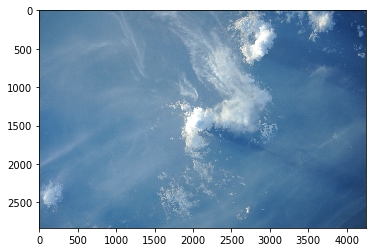

(2832, 4256, 3)
feature size: 36158976


In [21]:
img = mpimg.imread(datasetPath + imageTagMap.get(trueClass,None)[0])
plt.imshow(img)
plt.show()
print(img.shape)
print('feature size: ' + str(img.shape[0]*img.shape[1] * img.shape[2]))

## Example Image of Tag 2

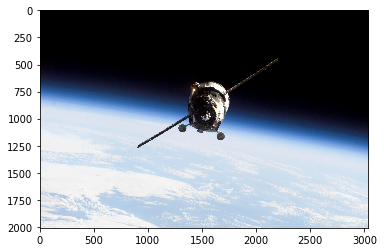

(2008, 3032, 3)
feature size: 18264768


In [22]:
img = mpimg.imread(datasetPath + imageTagMap.get(falseClass,None)[0])
plt.imshow(img)
plt.show()
print(img.shape)
print('feature size: ' + str(img.shape[0]*img.shape[1] * img.shape[2]))

## Format Image

In [23]:
def forceLandscape(image):
    if image.shape[0] > image.shape[1]:
        return np.rot90(image)
    return image

In [24]:
def resizeImage(image, x,y):
    return scipy.misc.imresize(image,(x,y), interp='nearest')

In [25]:
def blackAndWhite(image):
    image = np.dot(image[...,:3], [0.21, 0.72, 0.07])
    image[image < 128] = 0    # Black
    image[image >= 128] = 255 # White
    return image

In [26]:
def grayscale(image):
    return np.dot(image[...,:3], [0.21, 0.72, 0.07])

In [27]:
def reshape(image):
    return image.flatten()

In [28]:
def formatImage(image):
    image = forceLandscape(image)
    image = resizeImage(image, imageX, imageY)
    image = grayscale(image)
    return image

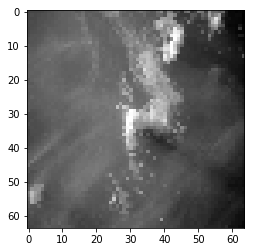

(64, 64)
feature size: 4096


In [29]:
img = mpimg.imread(datasetPath + imageTagMap.get(trueClass,None)[0])
img = formatImage(img)
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)
print('feature size: ' + str(img.shape[0]*img.shape[1]))

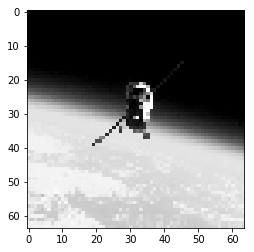

(64, 64)
feature size: 4096


In [30]:
img = mpimg.imread(datasetPath + imageTagMap.get(falseClass,None)[0])
img = formatImage(img)
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)
print('feature size: ' + str(img.shape[0]*img.shape[1]))

## Load Images into a dataset

In [31]:
X = []
Y = []
testingSet = []

trainingIndexes = random.sample(range(len(imageTagMap.get(trueClass,None))), math.floor(len(imageTagMap.get(trueClass,None))/3)*2)
for index in trainingIndexes:
    img = mpimg.imread(datasetPath + imageTagMap.get(trueClass,None)[index])
    img = formatImage(img)
    img = reshape(img)
    X.append(img)
    Y.append(trueClass)
    
for index in range(len(imageTagMap.get(trueClass,None))):
    if index not in trainingIndexes:
        img = mpimg.imread(datasetPath + imageTagMap.get(trueClass,None)[index])
        img = formatImage(img)
        img = reshape(img)
        testingSet.append([img, trueClass])
    
trainingIndexes = random.sample(range(len(imageTagMap.get(falseClass,None))), math.floor(len(imageTagMap.get(falseClass,None))/3)*2)
for index in trainingIndexes:
    img = mpimg.imread(datasetPath + imageTagMap.get(falseClass,None)[index])
    img = formatImage(img)
    img = reshape(img)
    X.append(img)
    Y.append(falseClass)
                   
for index in range(len(imageTagMap.get(falseClass,None))):
    if index not in trainingIndexes:
        img = mpimg.imread(datasetPath + imageTagMap.get(falseClass,None)[index])
        img = formatImage(img)
        img = reshape(img)
        testingSet.append([img, falseClass])
                   
print('loading complete')

loading complete


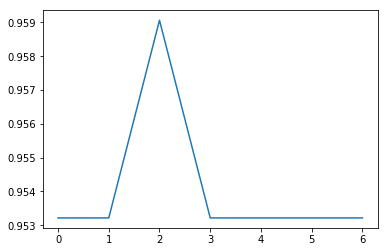

In [71]:
def column(matrix, i):
    return [row[i] for row in matrix]

results = [];
kRange = range(1,8)

for k in kRange:
    correct = 0
    knn = neighbors.KNeighborsClassifier(k, weights='distance')
    knn.fit(X, Y)
    Z = knn.predict(column(testingSet, 0))
    for i in range(len(Z)):
        if testingSet[i][1] == Z[i]:
            correct += 1
    results.append(correct/len(Z))
plt.plot(results)
plt.show()